In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

[[[-1 -1  1 -1]
  [ 2 -1 -1  0]
  [ 3  1 -1  0]
  [ 6  2  4  0]
  [ 5 -1 -1  3]
  [-1  4 -1  3]
  [ 9  3  7  0]
  [ 8 -1 -1  6]
  [-1  7 -1  6]
  [-1  6 -1  0]]]


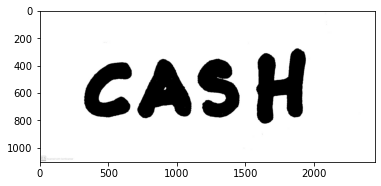

In [59]:
image = cv2.imread('word3.jpg')
im = image.copy()
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(im, cmap='gray')
print(hierarchy)

(2695732,)

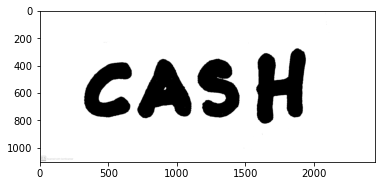

In [60]:
plt.imshow(imgray, cmap='gray')
imgray = imgray.flatten()
imgray.shape

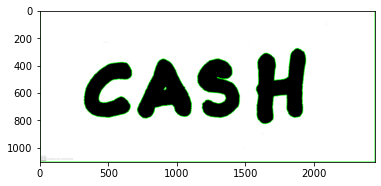

In [61]:
with_contours = cv2.drawContours(im, contours, -1, (0,255,0), 3)
plt.imshow(im, cmap='gray')

In [62]:
# NEW
new_images = []
for hr,c in zip(hierarchy[0],contours):
  x, y, w, h = cv2.boundingRect(c)
 
    # Make sure contour area is large enough
  if hr[3]==0 and (cv2.contourArea(c)) > 9000:
    cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
    alpha_im = image[y:(y+h),x:(x+w)]
    alpha_im = cv2.cvtColor(alpha_im, cv2.COLOR_BGR2GRAY)
    alpha_im = cv2.bitwise_not(alpha_im)
    alpha_im = cv2.copyMakeBorder(alpha_im,100,100,100,100,cv2.BORDER_CONSTANT)
    alpha_im = cv2.resize(alpha_im, (28,28)).flatten()
    
    print(alpha_im.shape)
    new_images.append(alpha_im)

new_images = np.array(new_images)
new_images.shape

(784,)
(784,)
(784,)
(784,)


(4, 784)

In [63]:
# OLD
# new_images = []
# for c in contours:
#   x, y, w, h = cv2.boundingRect(c)
 
#     # Make sure contour area is large enough
#   if (cv2.contourArea(c)) > 9000:
#     cv2.rectangle(with_contours,(x,y), (x+w,y+h), (255,0,0), 5)
#     alpha_im = image[y:(y+h),x:(x+w)]
#     alpha_im = cv2.cvtColor(alpha_im, cv2.COLOR_BGR2GRAY)
#     alpha_im = cv2.bitwise_not(alpha_im)
#     alpha_im = cv2.copyMakeBorder(alpha_im,100,100,100,100,cv2.BORDER_CONSTANT)
#     alpha_im = cv2.resize(alpha_im, (28,28)).flatten()
    
#     print(alpha_im.shape)
#     new_images.append(alpha_im)

# new_images = np.array(new_images[1:])
# new_images.shape

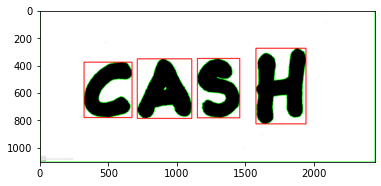

In [64]:
plt.imshow(with_contours)

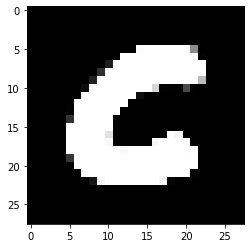

In [65]:
plt.imshow(new_images[0].reshape(28,28), cmap='gray')

In [66]:
A_Z = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
model = load_model("alpha_pred.h5")

In [67]:
# scaler = StandardScaler()
# new_images = scaler.fit_transform(new_images)

In [68]:
from joblib import load
scaler=load('std_scaler.bin')
new_images = scaler.transform(new_images)

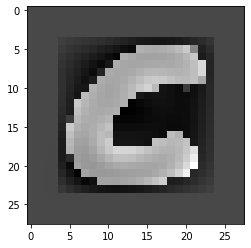

In [69]:
plt.imshow(new_images[0].reshape(28,28), cmap='gray')

In [70]:
new_images.shape

(4, 784)

In [71]:
predictions = [ np.argmax(np.array(list(map(int,pred == max(pred))))) for pred in model.predict(new_images)]
predictions = [A_Z[p] for p in predictions]
predictions

['C', 'A', 'S', 'H']

In [72]:
predicted_word = "".join(predictions)
predicted_word = predicted_word.lower()
predicted_word

'cash'

In [73]:
from english_words import english_words_set
import difflib

if(predicted_word in english_words_set):
    print(f"Recognised word: {predicted_word}")
else:
    close_matches = difflib.get_close_matches(predicted_word, english_words_set)
    print(f"Sorry we are unable to recognise your word,\nDid you mean any of these:  {close_matches}")

Recognised word: cash


In [74]:
# pip install cdifflib

In [75]:
# pip install english-words